In [105]:
# Import libraries
import cv2
import dlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Part A

In [122]:
# Load images and convert to RGB
img1 = cv2.cvtColor(cv2.imread('1.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('2.png'), cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(cv2.imread('3.png'), cv2.COLOR_BGR2RGB)

In [123]:
# Create an instance of the model
detector = dlib.get_frontal_face_detector()

# A function for detect faces and save the coordinates
def face_detector(img):

    dets = detector(img, 1)
    print("Number of faces detected: {}".format(len(dets)))
    for i, d in enumerate(dets):
        print(
            "Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
                i, d.left(), d.top(), d.right(), d.bottom()))
    return dets


# A Function for plot boxes on detected faces
def plot_boxes(img, dets):

    img_copy = img.copy()
    # Loop through the detected faces
    for face in dets:
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        # Draw a rectangle around the detected face
        cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # Plot the result
    plt.imshow(img_copy)
    plt.axis('off')
    plt.show()

In [124]:
# Apply face_detector function on images
print('First Image:')
boxes1 = face_detector(img1)
print('------------------------------------------------')

print('Second Image:')
boxes2 = face_detector(img2)
print('------------------------------------------------')

print('Third Image:')
boxes3 = face_detector(img3)
print('------------------------------------------------')

First Image:
Number of faces detected: 1
Detection 0: Left: 111 Top: 142 Right: 379 Bottom: 409
------------------------------------------------
Second Image:
Number of faces detected: 3
Detection 0: Left: 1171 Top: 325 Right: 1356 Bottom: 511
Detection 1: Left: 266 Top: 588 Right: 489 Bottom: 811
Detection 2: Left: 820 Top: 180 Right: 1005 Bottom: 366
------------------------------------------------
Third Image:
Number of faces detected: 2
Detection 0: Left: 718 Top: 333 Right: 1103 Bottom: 718
Detection 1: Left: 161 Top: 376 Right: 546 Bottom: 761
------------------------------------------------


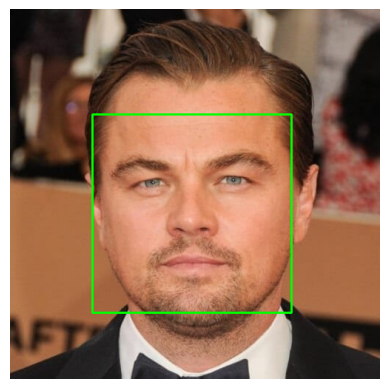

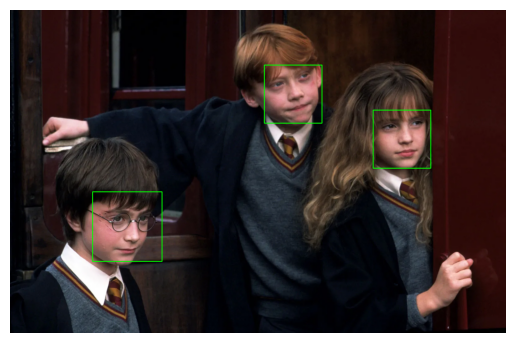

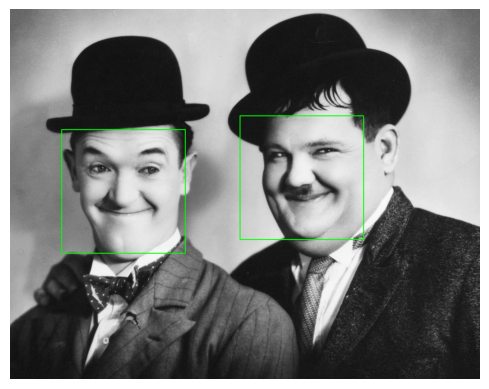

In [125]:
# Plot boxes on detected faces
plot_boxes(img1, boxes1)
plot_boxes(img2, boxes2)
plot_boxes(img3, boxes3)

### Part B

In [110]:
# Load the model and create a predictor for keypoints
predictor = dlib.shape_predictor(
    'shape_predictor_68_face_landmarks.dat')

In [111]:
# A function to predict and draw keypoints on the faces
def key_points(img, det):
    img_copy = img.copy()
    keypoints = []
    for face in det:
        # Predict keypoints
        points = predictor(img, face)

        # Loop through the 68 keypoints and draw them on the faces
        for i in range(68):
            x, y = points.part(i).x, points.part(i).y
            keypoints.append((x, y))
            cv2.circle(img_copy, (x, y), 3, (0, 255, 0), -1)

    # Plot the result
    plt.imshow(img_copy)
    plt.axis('off')
    plt.show()

    return keypoints

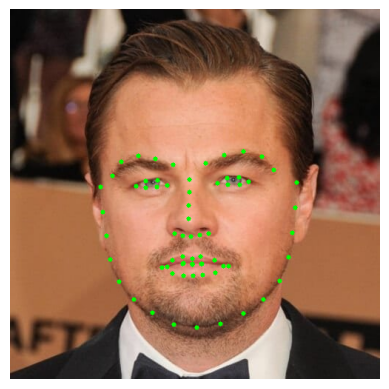

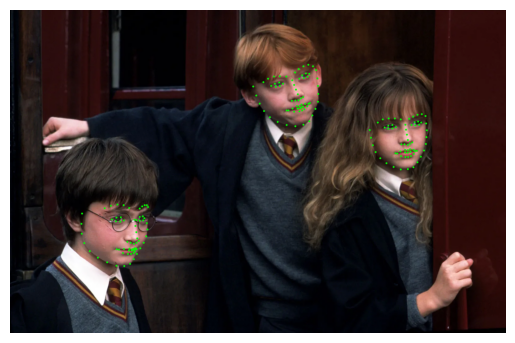

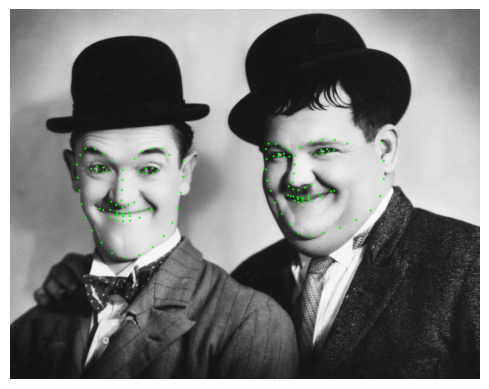

In [112]:
# Apply key_points function on images
keypoints_1 = key_points(img1, boxes1)
keypoints_2 = key_points(img2, boxes2)
keypoints_3 = key_points(img3, boxes3)

### Part C

[]

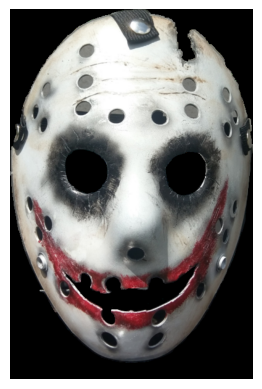

In [113]:
# Load joker mask and convert to RGB
joker_mask = cv2.cvtColor(cv2.imread('joker.png'), cv2.COLOR_BGR2RGB)

# Plot joker mask
plt.imshow(joker_mask)
plt.axis('off')
plt.plot()

In [114]:
# Load csv file
joker_df = pd.read_csv('joker.csv')

# save joker keypoints in an array
joker_keypoints = joker_df.values

# Print the shape of keypoints array
print(joker_keypoints.shape)

(68, 2)


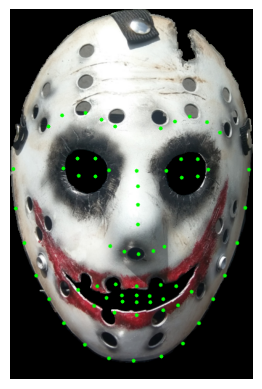

In [115]:
# Loop through the 68 keypoints and draw them on joker image
joker_mask_copy = joker_mask.copy()
for i in range(68):
    x, y = joker_keypoints[i]
    cv2.circle(joker_mask_copy, (x, y), 3, (0, 255, 0), -1)

# Plot the result
plt.imshow(joker_mask_copy)
plt.axis('off')
plt.show()

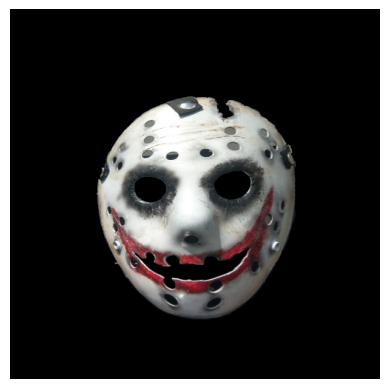

In [116]:
# Calculate homography matrix
homography_matrix, _ = cv2.findHomography(
    np.array(joker_keypoints), np.array(keypoints_1), 0, None)

# get the shape of img1
height, width, _ = img1.shape

# make a copy of the original image
img1_copy = img1.copy()

# Warp the mask onto the face
warped_mask = cv2.warpPerspective(
    joker_mask, homography_matrix, (width, height))

# Plot warped mask
plt.imshow(warped_mask)
plt.axis('off')
plt.show()

### Part D

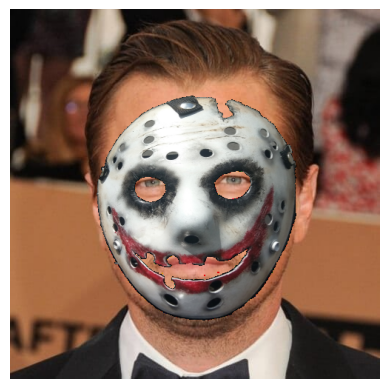

In [117]:
# Merge the warped mask with the original face
masked_face = np.where(warped_mask != 0, warped_mask, img1_copy)

# Plot the masked face
plt.imshow(masked_face)
plt.axis('off')
plt.show()

### Part 1

سیفت نقاط کلیدی بیشتر و متفاوت تر میتواند برای ما تولید کند اما با توجه به اینکه برای فیت کردن ماسک به یک سری از جاهای چهره نیاز داریم تا با نقاط کلیدی ماسک تناظر داشته باشند، در واقع همان 68 نقطه که جاهای مهم صورت مانند چشم و دهان و دماغ را مشخص میکنند، استفاده از سیفت در اینجا توصیه نمیشود و مدلی را میخواهیم که دقیقا همان نقاط کلیدی که روی ماسک مشخص شده است را از چهره دربیاورد. 

### Part 2

Apply on 1.png (I also done this in part D).

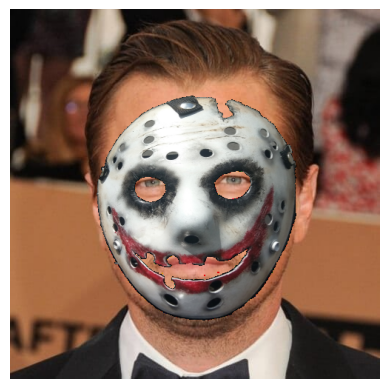

In [118]:
# Plot the masked face
plt.imshow(masked_face)
plt.axis('off')
plt.show()

### Part 3

Apply on 2.png

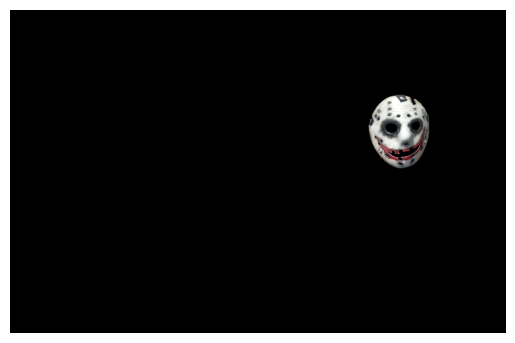

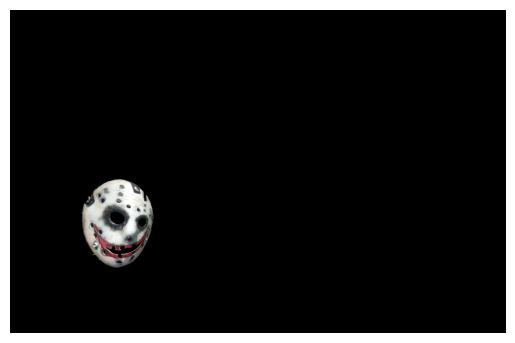

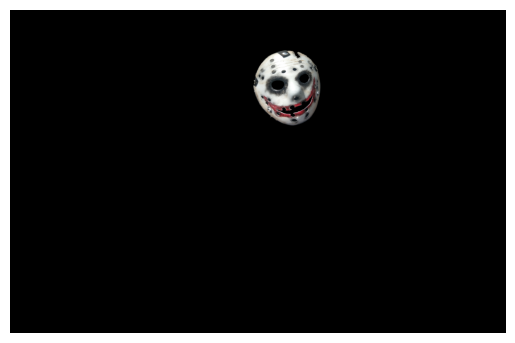

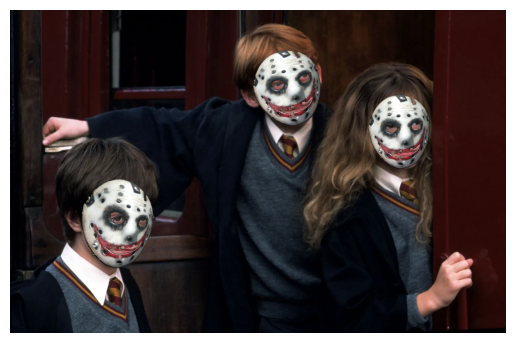

In [119]:
# Make copies
img2_copy = img2.copy()
masked_img2 = img2.copy()

# Get height & width of the img2
height, width, _ = img2.shape

# Loop through the faces
for face in boxes2:

    # Predict keypoints
    points = predictor(img2_copy, face)

    # A list to store keypoints
    keypoints = []

    # Loop through the 68 keypoints and store them in the list
    for i in range(68):
        x, y = points.part(i).x, points.part(i).y
        keypoints.append((x, y))

    # Calculate homography matrix
    homography_matrix, _ = cv2.findHomography(
        np.array(joker_keypoints), np.array(keypoints), 0, None)

    # Warp the mask onto the face
    warped_mask = cv2.warpPerspective(
        joker_mask, homography_matrix, (width, height))

    # Merge the warped mask with the original image
    masked_img2 = np.where(warped_mask != 0, warped_mask, masked_img2)

    # Plot warped mask
    plt.imshow(warped_mask)
    plt.axis('off')
    plt.show()
    plt.figure()

# Plot the masked face
plt.imshow(masked_img2)
plt.axis('off')
plt.show()

 In the following part I changed the methods and used RANSAC, MLEDS, RHO with different thresholds (RHO does not need threshold), and finally the RHO method was a bit better than the other ones.

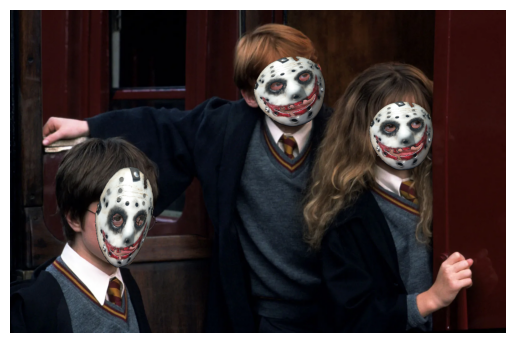

In [120]:
# Make copies
img2_copy = img2.copy()
masked_img2 = img2.copy()

# Get height & width of the img2
height, width, _ = img2.shape

# Loop through the faces
for face in boxes2:

    # Predict keypoints
    points = predictor(img2_copy, face)

    # A list to store keypoints
    keypoints = []

    # Loop through the 68 keypoints and store them in the list
    for i in range(68):
        x, y = points.part(i).x, points.part(i).y
        keypoints.append((x, y))

    # Calculate homography matrix
    homography_matrix, _ = cv2.findHomography(
        np.array(joker_keypoints), np.array(keypoints), cv2.RHO)

    # Warp the mask onto the face
    warped_mask = cv2.warpPerspective(
        joker_mask, homography_matrix, (width, height))

    # Merge the warped mask with the original image
    masked_img2 = np.where(warped_mask != 0, warped_mask, masked_img2)

# Plot the masked face
plt.imshow(masked_img2)
plt.axis('off')
plt.show()

### Part 4

Apply on image 3.png

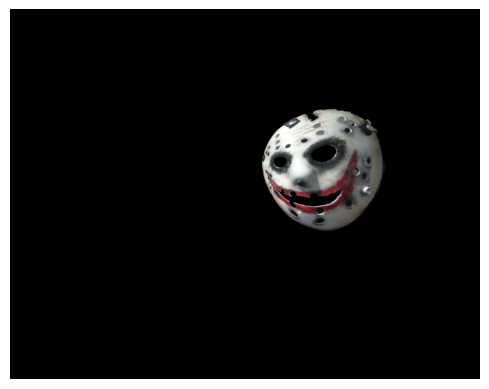

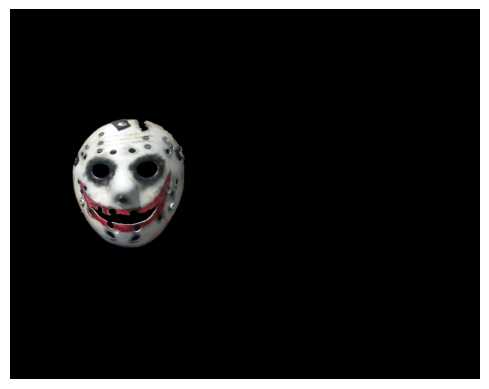

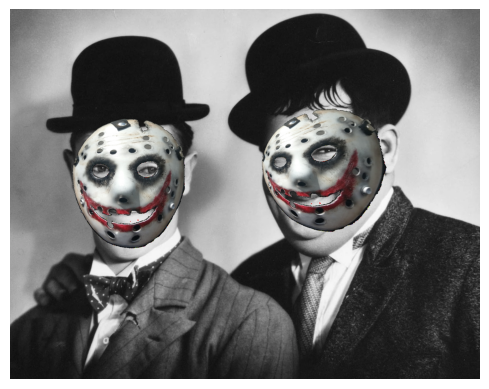

In [121]:
# Make copies
img3_copy = img3.copy()
masked_img3 = img3.copy()

# Get the height & width of the img3
height, width, _ = img3.shape

# Loop through the faces
for face in boxes3:

    # Predict keypoints
    points = predictor(img3_copy, face)

    # A list to store keypoints
    keypoints = []

    # Loop through the 68 keypoints and store them in the list
    for i in range(68):
        x, y = points.part(i).x, points.part(i).y
        keypoints.append((x, y))

    # Calculate homography matrix
    homography_matrix, _ = cv2.findHomography(
        np.array(joker_keypoints), np.array(keypoints), 0, None)

    # Warp the mask onto the face
    warped_mask = cv2.warpPerspective(
        joker_mask, homography_matrix, (width, height))

    # Merge the warped mask with the original image
    masked_img3 = np.where(warped_mask != 0, warped_mask, masked_img3)

    # Plot warped mask
    plt.imshow(warped_mask)
    plt.axis('off')
    plt.show()
    plt.figure()

# Plot the masked face
plt.imshow(masked_img3)
plt.axis('off')
plt.show()

Solution?

به طور کلی چهره هایی که بخشی از انها روبری دوربین نباشد، در واقع با صفحه دوربین زاویه داشته باشند، چون با استفاده از 68 نقطه کلیدی قرار است ماتریس هوموگرافی را تخمین بزنیم، با توجه به اینکه نقاط کلیدی چهره با نقاط کلیدی ماسک از لحاط مکانی به خوبی چهره های بدون زاویه نیست، ماتریس هوموگرافی نیز به خوبی تخمین زده نمیشود و ماسک به خوبی وارپ نخواهد شد.

برای بهتر شدن نتیجه میتوان از مدلی استفاده کرد که نقاط کلیدی بهتر و همچنین با تعداد بیشتر برای اینگونه چهره ها دربیاورد تا فرایند تخمین و وارپینگ با خطای کمتری انجام شود.

یا میتوان از ماسکی استفاده کنیم که مانند چهره های زاویه دار، خودش نیز زاویه دار باشد تا تطابق بهتری میان نقاط کلیدی ماسک و چهره داشته باشیم.

  همینطور دراینجا باتوجه به اینکه حالت چهره ها خنثی نیست و در حال لبخند زدن هستند نقاط کلیدی چهره به نسبت حالت خنثی خوب مچ نشده اند با نقاط کلیدی ماسک و این امر باعث میشود ماسک بخوبی روی چهره وارپ نشود.